# Logistic Regression

## Data Preprocessing

In [130]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory
month_file = '2_June'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

In [131]:
# Load original dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session.parquet')

print(dataset.columns)

Index(['playerkey', 'session_time', 'rank', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
       'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom',
       '#dec_slotdenom'

## Load Dataframes

In [132]:
# Filter Columns
filter = ['session_time', 'gender',  'sim_play', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
        'min_time_per_gamble', 'percentile']

# Columns NOT INCLUDED
# 'playerkey', 'rank', 'age_range', '#W', '#L', '#NH', '#D', #2ws, #3ws, #4ws, 2ws_profit, 3ws_profit, 4ws_profit,
# 2ws_wgramt, 3ws_wgramt, 4ws_wgramt, ave_time_per_machine, 'total_duration', 'total_gambles'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Convert ave_time_per_machine to seconds
# dataset['ave_time_per_machine'] = dataset['ave_time_per_machine'].dt.total_seconds()

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking Care of Missing Data

X[:, 3:31] it covers from beggining account balance to 4ws_wgramt column

We do not need this step since we do not have missing data!

In [133]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:31])
# X[:, 3:31] = imputer.transform(X[:, 3:31])

## Encoding Categorical Data

### Encoding the Independent Variable

In [134]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender and simplay
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])

In [135]:
# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3, 6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable

In [136]:
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])

## Training the Logistic Regression model on 

1.   X_train
2.   y_train

the Training set

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Which IDVs have the most weight in the model

In [140]:
# Get the feature names after one-hot encoding
feature_names = ct.get_feature_names_out()

# Get the coefficients and feature importance
coefficients = classifier.coef_[0]
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance by absolute coefficient values
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x26: -2.2805920047290438
remainder__x24: 0.9851598107826403
remainder__x22: 0.8342478334658692
remainder__x18: 0.6773267801701498
remainder__x4: -0.6341224496406583
remainder__x23: -0.614121862516057
remainder__x13: 0.5262996356563355
remainder__x9: 0.47504765422873124
remainder__x14: -0.46943539882429786
encoder__x6_near-hit: 0.46792165999041235
remainder__x21: -0.46451219884215716
encoder__x3_gain: 0.45970853330551753
encoder__x3_loss: -0.4466626556140419
remainder__x25: 0.38378225175137315
encoder__x2_Silent: -0.367801941032949
encoder__x2_Baby Boomers: 0.33268807912964016
remainder__x7: -0.31083332299589955
remainder__x0: -0.3048572800145662
remainder__x19: -0.2754928828483124
remainder__x5: -0.26048002611079074
remainder__x10: 0.2583141745485213
encoder__x6_draw: -0.25066524898023207
remainder__x12: -0.23440430116602662
encoder__x3_draw: -0.21728142930374061
encoder__x3_near-hit: 0.20419636930491297
remainder__x1: 0.19268290186513348
remainder__x17: -0.1737909515607338


In [141]:
from sklearn.inspection import permutation_importance

result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x26: 0.12643678160919544
remainder__x24: 0.08965517241379312
remainder__x18: 0.06896551724137934
remainder__x22: 0.05287356321839084
remainder__x9: 0.02758620689655176
remainder__x13: 0.02528735632183913
remainder__x25: 0.01609195402298853
remainder__x5: 0.01494252873563221
remainder__x7: 0.01379310344827588
remainder__x14: 0.012643678160919557
remainder__x4: 0.01149425287356325
remainder__x12: 0.011494252873563227
encoder__x2_Silent: 0.011494252873563215
encoder__x3_near-hit: 0.009195402298850585
remainder__x17: 0.009195402298850585
encoder__x6_near-hit: 0.008045977011494277
remainder__x0: 0.008045977011494254
encoder__x3_loss: 0.006896551724137967
remainder__x21: 0.0068965517241379335
encoder__x2_Baby Boomers: 0.0057471264367816135
remainder__x10: 0.0057471264367816135
remainder__x16: 0.0057471264367816135
remainder__x15: 0.004597701149425282
remainder__x20: 0.004597701149425282
remainder__x23: 0.0034482758620689945
encoder__x2_Millenials: 0.003448275862068961
encoder__x3_

### Predicting the Test set results

In [142]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


### Making the Confusion Matrix and Accuracy Score

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

# Interpretation of confusion matrix
print('True Positive (B20): ', cm[0][0])
print('True Negative (T20): ', cm[1][1])
print('False Positive: ', cm[0][1])
print('False Negative: ', cm[1][0])

[[ 3  1]
 [ 3 15]]
Accuracy:  0.8181818181818182
Precision:  0.9375
Recall:  0.8333333333333334
F1 Score:  0.8823529411764706
True Positive (B20):  3
True Negative (T20):  15
False Positive:  1
False Negative:  3


## Cumulative Accuracy Profile (CAP) Graph

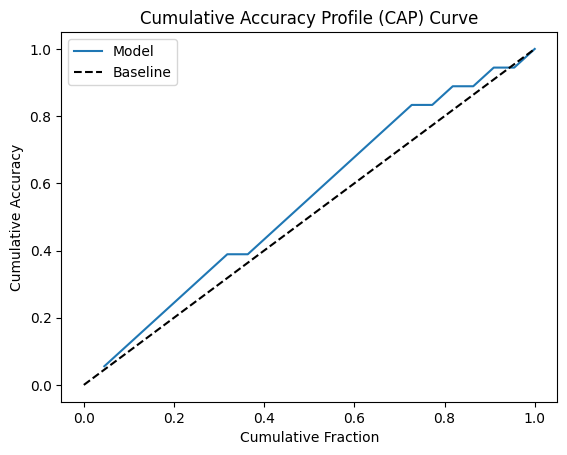

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()